In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras

from tensorflow.keras import datasets, layers, models


size=64

In [2]:
trainpath = r'C:\Users\Steve Adel\cnn object detection\Train'
testpath = r'C:\Users\Steve Adel\cnn object detection\Test'


In [3]:
for folder in  os.listdir(trainpath) :
    files = gb.glob(pathname= str( trainpath +'/' +folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 4000 in folder A
For training data , found 4000 in folder B
For training data , found 4000 in folder C
For training data , found 4000 in folder D
For training data , found 4000 in folder E
For training data , found 4000 in folder F
For training data , found 4000 in folder G
For training data , found 4000 in folder H
For training data , found 4000 in folder I
For training data , found 4000 in folder J
For training data , found 4000 in folder K
For training data , found 4000 in folder L
For training data , found 4000 in folder M
For training data , found 4000 in folder N
For training data , found 4000 in folder O
For training data , found 4000 in folder P
For training data , found 4000 in folder Q
For training data , found 4000 in folder R
For training data , found 4000 in folder S
For training data , found 4000 in folder Space
For training data , found 4000 in folder T
For training data , found 4000 in folder U
For training data , found 4000 in folder V
For tra

In [4]:
for folder in  os.listdir(testpath) :
    files = gb.glob(pathname= str( testpath +'/' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 504 in folder A
For testing data , found 504 in folder B
For testing data , found 504 in folder C
For testing data , found 504 in folder D
For testing data , found 504 in folder E
For testing data , found 504 in folder F
For testing data , found 504 in folder G
For testing data , found 504 in folder H
For testing data , found 504 in folder I
For testing data , found 504 in folder J
For testing data , found 504 in folder K
For testing data , found 504 in folder L
For testing data , found 504 in folder M
For testing data , found 504 in folder N
For testing data , found 504 in folder O
For testing data , found 504 in folder P
For testing data , found 504 in folder Q
For testing data , found 504 in folder R
For testing data , found 504 in folder S
For testing data , found 504 in folder Space
For testing data , found 504 in folder T
For testing data , found 504 in folder U
For testing data , found 504 in folder V
For testing data , found 504 in folder W
For testing 

In [5]:
print("num of GPU : ",len(tf.config.experimental.list_physical_devices('GPU')))

num of GPU :  1


In [6]:
classes={'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'J':9,'K':10,'L':11,'M':12,'N':13,'O':14,'P':15,'Q':16,'R':17,'S':18,'Space':19,'T':20,'U':21,'V':22,'W':23,'X':24,'Y':25,'Z':26}
def getcode(val):
    for x , y in classes.items():
        if y==val :
            return x
        


In [7]:
x_train = []
y_train = []
num=0
for folder in  os.listdir(trainpath) :
        files = gb.glob(pathname= str( trainpath +'/' + folder + '/*.jpg'))
        max=0
        for file in files:
            if(max==3200):
                break
            else:
                image = cv2.imread(file)
                image_array = cv2.resize(image , (size,size))
                x_train.append(list(image_array))
                y_train.append(classes[folder])
                print(num)
                max+=1
                num+=1
print('done')
            

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090


3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829


5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490


6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135


8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710
8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873


10350
10351
10352
10353
10354
10355
10356
10357
10358
10359
10360
10361
10362
10363
10364
10365
10366
10367
10368
10369
10370
10371
10372
10373
10374
10375
10376
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
10387
10388
10389
10390
10391
10392
10393
10394
10395
10396
10397
10398
10399
10400
10401
10402
10403
10404
10405
10406
10407
10408
10409
10410
10411
10412
10413
10414
10415
10416
10417
10418
10419
10420
10421
10422
10423
10424
10425
10426
10427
10428
10429
10430
10431
10432
10433
10434
10435
10436
10437
10438
10439
10440
10441
10442
10443
10444
10445
10446
10447
10448
10449
10450
10451
10452
10453
10454
10455
10456
10457
10458
10459
10460
10461
10462
10463
10464
10465
10466
10467
10468
10469
10470
10471
10472
10473
10474
10475
10476
10477
10478
10479
10480
10481
10482
10483
10484
10485
10486
10487
10488
10489
10490
10491
10492
10493
10494
10495
10496
10497
10498
10499
10500
10501
10502
10503
10504
10505
10506
10507
10508
10509
10510
10511
10512
10513
10514
10515
1051

11719
11720
11721
11722
11723
11724
11725
11726
11727
11728
11729
11730
11731
11732
11733
11734
11735
11736
11737
11738
11739
11740
11741
11742
11743
11744
11745
11746
11747
11748
11749
11750
11751
11752
11753
11754
11755
11756
11757
11758
11759
11760
11761
11762
11763
11764
11765
11766
11767
11768
11769
11770
11771
11772
11773
11774
11775
11776
11777
11778
11779
11780
11781
11782
11783
11784
11785
11786
11787
11788
11789
11790
11791
11792
11793
11794
11795
11796
11797
11798
11799
11800
11801
11802
11803
11804
11805
11806
11807
11808
11809
11810
11811
11812
11813
11814
11815
11816
11817
11818
11819
11820
11821
11822
11823
11824
11825
11826
11827
11828
11829
11830
11831
11832
11833
11834
11835
11836
11837
11838
11839
11840
11841
11842
11843
11844
11845
11846
11847
11848
11849
11850
11851
11852
11853
11854
11855
11856
11857
11858
11859
11860
11861
11862
11863
11864
11865
11866
11867
11868
11869
11870
11871
11872
11873
11874
11875
11876
11877
11878
11879
11880
11881
11882
11883
11884
1188

13187
13188
13189
13190
13191
13192
13193
13194
13195
13196
13197
13198
13199
13200
13201
13202
13203
13204
13205
13206
13207
13208
13209
13210
13211
13212
13213
13214
13215
13216
13217
13218
13219
13220
13221
13222
13223
13224
13225
13226
13227
13228
13229
13230
13231
13232
13233
13234
13235
13236
13237
13238
13239
13240
13241
13242
13243
13244
13245
13246
13247
13248
13249
13250
13251
13252
13253
13254
13255
13256
13257
13258
13259
13260
13261
13262
13263
13264
13265
13266
13267
13268
13269
13270
13271
13272
13273
13274
13275
13276
13277
13278
13279
13280
13281
13282
13283
13284
13285
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
1335

14569
14570
14571
14572
14573
14574
14575
14576
14577
14578
14579
14580
14581
14582
14583
14584
14585
14586
14587
14588
14589
14590
14591
14592
14593
14594
14595
14596
14597
14598
14599
14600
14601
14602
14603
14604
14605
14606
14607
14608
14609
14610
14611
14612
14613
14614
14615
14616
14617
14618
14619
14620
14621
14622
14623
14624
14625
14626
14627
14628
14629
14630
14631
14632
14633
14634
14635
14636
14637
14638
14639
14640
14641
14642
14643
14644
14645
14646
14647
14648
14649
14650
14651
14652
14653
14654
14655
14656
14657
14658
14659
14660
14661
14662
14663
14664
14665
14666
14667
14668
14669
14670
14671
14672
14673
14674
14675
14676
14677
14678
14679
14680
14681
14682
14683
14684
14685
14686
14687
14688
14689
14690
14691
14692
14693
14694
14695
14696
14697
14698
14699
14700
14701
14702
14703
14704
14705
14706
14707
14708
14709
14710
14711
14712
14713
14714
14715
14716
14717
14718
14719
14720
14721
14722
14723
14724
14725
14726
14727
14728
14729
14730
14731
14732
14733
14734
1473

15946
15947
15948
15949
15950
15951
15952
15953
15954
15955
15956
15957
15958
15959
15960
15961
15962
15963
15964
15965
15966
15967
15968
15969
15970
15971
15972
15973
15974
15975
15976
15977
15978
15979
15980
15981
15982
15983
15984
15985
15986
15987
15988
15989
15990
15991
15992
15993
15994
15995
15996
15997
15998
15999
16000
16001
16002
16003
16004
16005
16006
16007
16008
16009
16010
16011
16012
16013
16014
16015
16016
16017
16018
16019
16020
16021
16022
16023
16024
16025
16026
16027
16028
16029
16030
16031
16032
16033
16034
16035
16036
16037
16038
16039
16040
16041
16042
16043
16044
16045
16046
16047
16048
16049
16050
16051
16052
16053
16054
16055
16056
16057
16058
16059
16060
16061
16062
16063
16064
16065
16066
16067
16068
16069
16070
16071
16072
16073
16074
16075
16076
16077
16078
16079
16080
16081
16082
16083
16084
16085
16086
16087
16088
16089
16090
16091
16092
16093
16094
16095
16096
16097
16098
16099
16100
16101
16102
16103
16104
16105
16106
16107
16108
16109
16110
16111
1611

17402
17403
17404
17405
17406
17407
17408
17409
17410
17411
17412
17413
17414
17415
17416
17417
17418
17419
17420
17421
17422
17423
17424
17425
17426
17427
17428
17429
17430
17431
17432
17433
17434
17435
17436
17437
17438
17439
17440
17441
17442
17443
17444
17445
17446
17447
17448
17449
17450
17451
17452
17453
17454
17455
17456
17457
17458
17459
17460
17461
17462
17463
17464
17465
17466
17467
17468
17469
17470
17471
17472
17473
17474
17475
17476
17477
17478
17479
17480
17481
17482
17483
17484
17485
17486
17487
17488
17489
17490
17491
17492
17493
17494
17495
17496
17497
17498
17499
17500
17501
17502
17503
17504
17505
17506
17507
17508
17509
17510
17511
17512
17513
17514
17515
17516
17517
17518
17519
17520
17521
17522
17523
17524
17525
17526
17527
17528
17529
17530
17531
17532
17533
17534
17535
17536
17537
17538
17539
17540
17541
17542
17543
17544
17545
17546
17547
17548
17549
17550
17551
17552
17553
17554
17555
17556
17557
17558
17559
17560
17561
17562
17563
17564
17565
17566
17567
1756

18865
18866
18867
18868
18869
18870
18871
18872
18873
18874
18875
18876
18877
18878
18879
18880
18881
18882
18883
18884
18885
18886
18887
18888
18889
18890
18891
18892
18893
18894
18895
18896
18897
18898
18899
18900
18901
18902
18903
18904
18905
18906
18907
18908
18909
18910
18911
18912
18913
18914
18915
18916
18917
18918
18919
18920
18921
18922
18923
18924
18925
18926
18927
18928
18929
18930
18931
18932
18933
18934
18935
18936
18937
18938
18939
18940
18941
18942
18943
18944
18945
18946
18947
18948
18949
18950
18951
18952
18953
18954
18955
18956
18957
18958
18959
18960
18961
18962
18963
18964
18965
18966
18967
18968
18969
18970
18971
18972
18973
18974
18975
18976
18977
18978
18979
18980
18981
18982
18983
18984
18985
18986
18987
18988
18989
18990
18991
18992
18993
18994
18995
18996
18997
18998
18999
19000
19001
19002
19003
19004
19005
19006
19007
19008
19009
19010
19011
19012
19013
19014
19015
19016
19017
19018
19019
19020
19021
19022
19023
19024
19025
19026
19027
19028
19029
19030
1903

20330
20331
20332
20333
20334
20335
20336
20337
20338
20339
20340
20341
20342
20343
20344
20345
20346
20347
20348
20349
20350
20351
20352
20353
20354
20355
20356
20357
20358
20359
20360
20361
20362
20363
20364
20365
20366
20367
20368
20369
20370
20371
20372
20373
20374
20375
20376
20377
20378
20379
20380
20381
20382
20383
20384
20385
20386
20387
20388
20389
20390
20391
20392
20393
20394
20395
20396
20397
20398
20399
20400
20401
20402
20403
20404
20405
20406
20407
20408
20409
20410
20411
20412
20413
20414
20415
20416
20417
20418
20419
20420
20421
20422
20423
20424
20425
20426
20427
20428
20429
20430
20431
20432
20433
20434
20435
20436
20437
20438
20439
20440
20441
20442
20443
20444
20445
20446
20447
20448
20449
20450
20451
20452
20453
20454
20455
20456
20457
20458
20459
20460
20461
20462
20463
20464
20465
20466
20467
20468
20469
20470
20471
20472
20473
20474
20475
20476
20477
20478
20479
20480
20481
20482
20483
20484
20485
20486
20487
20488
20489
20490
20491
20492
20493
20494
20495
2049

21696
21697
21698
21699
21700
21701
21702
21703
21704
21705
21706
21707
21708
21709
21710
21711
21712
21713
21714
21715
21716
21717
21718
21719
21720
21721
21722
21723
21724
21725
21726
21727
21728
21729
21730
21731
21732
21733
21734
21735
21736
21737
21738
21739
21740
21741
21742
21743
21744
21745
21746
21747
21748
21749
21750
21751
21752
21753
21754
21755
21756
21757
21758
21759
21760
21761
21762
21763
21764
21765
21766
21767
21768
21769
21770
21771
21772
21773
21774
21775
21776
21777
21778
21779
21780
21781
21782
21783
21784
21785
21786
21787
21788
21789
21790
21791
21792
21793
21794
21795
21796
21797
21798
21799
21800
21801
21802
21803
21804
21805
21806
21807
21808
21809
21810
21811
21812
21813
21814
21815
21816
21817
21818
21819
21820
21821
21822
21823
21824
21825
21826
21827
21828
21829
21830
21831
21832
21833
21834
21835
21836
21837
21838
21839
21840
21841
21842
21843
21844
21845
21846
21847
21848
21849
21850
21851
21852
21853
21854
21855
21856
21857
21858
21859
21860
21861
2186

23157
23158
23159
23160
23161
23162
23163
23164
23165
23166
23167
23168
23169
23170
23171
23172
23173
23174
23175
23176
23177
23178
23179
23180
23181
23182
23183
23184
23185
23186
23187
23188
23189
23190
23191
23192
23193
23194
23195
23196
23197
23198
23199
23200
23201
23202
23203
23204
23205
23206
23207
23208
23209
23210
23211
23212
23213
23214
23215
23216
23217
23218
23219
23220
23221
23222
23223
23224
23225
23226
23227
23228
23229
23230
23231
23232
23233
23234
23235
23236
23237
23238
23239
23240
23241
23242
23243
23244
23245
23246
23247
23248
23249
23250
23251
23252
23253
23254
23255
23256
23257
23258
23259
23260
23261
23262
23263
23264
23265
23266
23267
23268
23269
23270
23271
23272
23273
23274
23275
23276
23277
23278
23279
23280
23281
23282
23283
23284
23285
23286
23287
23288
23289
23290
23291
23292
23293
23294
23295
23296
23297
23298
23299
23300
23301
23302
23303
23304
23305
23306
23307
23308
23309
23310
23311
23312
23313
23314
23315
23316
23317
23318
23319
23320
23321
23322
2332

24524
24525
24526
24527
24528
24529
24530
24531
24532
24533
24534
24535
24536
24537
24538
24539
24540
24541
24542
24543
24544
24545
24546
24547
24548
24549
24550
24551
24552
24553
24554
24555
24556
24557
24558
24559
24560
24561
24562
24563
24564
24565
24566
24567
24568
24569
24570
24571
24572
24573
24574
24575
24576
24577
24578
24579
24580
24581
24582
24583
24584
24585
24586
24587
24588
24589
24590
24591
24592
24593
24594
24595
24596
24597
24598
24599
24600
24601
24602
24603
24604
24605
24606
24607
24608
24609
24610
24611
24612
24613
24614
24615
24616
24617
24618
24619
24620
24621
24622
24623
24624
24625
24626
24627
24628
24629
24630
24631
24632
24633
24634
24635
24636
24637
24638
24639
24640
24641
24642
24643
24644
24645
24646
24647
24648
24649
24650
24651
24652
24653
24654
24655
24656
24657
24658
24659
24660
24661
24662
24663
24664
24665
24666
24667
24668
24669
24670
24671
24672
24673
24674
24675
24676
24677
24678
24679
24680
24681
24682
24683
24684
24685
24686
24687
24688
24689
2469

25975
25976
25977
25978
25979
25980
25981
25982
25983
25984
25985
25986
25987
25988
25989
25990
25991
25992
25993
25994
25995
25996
25997
25998
25999
26000
26001
26002
26003
26004
26005
26006
26007
26008
26009
26010
26011
26012
26013
26014
26015
26016
26017
26018
26019
26020
26021
26022
26023
26024
26025
26026
26027
26028
26029
26030
26031
26032
26033
26034
26035
26036
26037
26038
26039
26040
26041
26042
26043
26044
26045
26046
26047
26048
26049
26050
26051
26052
26053
26054
26055
26056
26057
26058
26059
26060
26061
26062
26063
26064
26065
26066
26067
26068
26069
26070
26071
26072
26073
26074
26075
26076
26077
26078
26079
26080
26081
26082
26083
26084
26085
26086
26087
26088
26089
26090
26091
26092
26093
26094
26095
26096
26097
26098
26099
26100
26101
26102
26103
26104
26105
26106
26107
26108
26109
26110
26111
26112
26113
26114
26115
26116
26117
26118
26119
26120
26121
26122
26123
26124
26125
26126
26127
26128
26129
26130
26131
26132
26133
26134
26135
26136
26137
26138
26139
26140
2614

27344
27345
27346
27347
27348
27349
27350
27351
27352
27353
27354
27355
27356
27357
27358
27359
27360
27361
27362
27363
27364
27365
27366
27367
27368
27369
27370
27371
27372
27373
27374
27375
27376
27377
27378
27379
27380
27381
27382
27383
27384
27385
27386
27387
27388
27389
27390
27391
27392
27393
27394
27395
27396
27397
27398
27399
27400
27401
27402
27403
27404
27405
27406
27407
27408
27409
27410
27411
27412
27413
27414
27415
27416
27417
27418
27419
27420
27421
27422
27423
27424
27425
27426
27427
27428
27429
27430
27431
27432
27433
27434
27435
27436
27437
27438
27439
27440
27441
27442
27443
27444
27445
27446
27447
27448
27449
27450
27451
27452
27453
27454
27455
27456
27457
27458
27459
27460
27461
27462
27463
27464
27465
27466
27467
27468
27469
27470
27471
27472
27473
27474
27475
27476
27477
27478
27479
27480
27481
27482
27483
27484
27485
27486
27487
27488
27489
27490
27491
27492
27493
27494
27495
27496
27497
27498
27499
27500
27501
27502
27503
27504
27505
27506
27507
27508
27509
2751

28796
28797
28798
28799
28800
28801
28802
28803
28804
28805
28806
28807
28808
28809
28810
28811
28812
28813
28814
28815
28816
28817
28818
28819
28820
28821
28822
28823
28824
28825
28826
28827
28828
28829
28830
28831
28832
28833
28834
28835
28836
28837
28838
28839
28840
28841
28842
28843
28844
28845
28846
28847
28848
28849
28850
28851
28852
28853
28854
28855
28856
28857
28858
28859
28860
28861
28862
28863
28864
28865
28866
28867
28868
28869
28870
28871
28872
28873
28874
28875
28876
28877
28878
28879
28880
28881
28882
28883
28884
28885
28886
28887
28888
28889
28890
28891
28892
28893
28894
28895
28896
28897
28898
28899
28900
28901
28902
28903
28904
28905
28906
28907
28908
28909
28910
28911
28912
28913
28914
28915
28916
28917
28918
28919
28920
28921
28922
28923
28924
28925
28926
28927
28928
28929
28930
28931
28932
28933
28934
28935
28936
28937
28938
28939
28940
28941
28942
28943
28944
28945
28946
28947
28948
28949
28950
28951
28952
28953
28954
28955
28956
28957
28958
28959
28960
28961
2896

30249
30250
30251
30252
30253
30254
30255
30256
30257
30258
30259
30260
30261
30262
30263
30264
30265
30266
30267
30268
30269
30270
30271
30272
30273
30274
30275
30276
30277
30278
30279
30280
30281
30282
30283
30284
30285
30286
30287
30288
30289
30290
30291
30292
30293
30294
30295
30296
30297
30298
30299
30300
30301
30302
30303
30304
30305
30306
30307
30308
30309
30310
30311
30312
30313
30314
30315
30316
30317
30318
30319
30320
30321
30322
30323
30324
30325
30326
30327
30328
30329
30330
30331
30332
30333
30334
30335
30336
30337
30338
30339
30340
30341
30342
30343
30344
30345
30346
30347
30348
30349
30350
30351
30352
30353
30354
30355
30356
30357
30358
30359
30360
30361
30362
30363
30364
30365
30366
30367
30368
30369
30370
30371
30372
30373
30374
30375
30376
30377
30378
30379
30380
30381
30382
30383
30384
30385
30386
30387
30388
30389
30390
30391
30392
30393
30394
30395
30396
30397
30398
30399
30400
30401
30402
30403
30404
30405
30406
30407
30408
30409
30410
30411
30412
30413
30414
3041

31683
31684
31685
31686
31687
31688
31689
31690
31691
31692
31693
31694
31695
31696
31697
31698
31699
31700
31701
31702
31703
31704
31705
31706
31707
31708
31709
31710
31711
31712
31713
31714
31715
31716
31717
31718
31719
31720
31721
31722
31723
31724
31725
31726
31727
31728
31729
31730
31731
31732
31733
31734
31735
31736
31737
31738
31739
31740
31741
31742
31743
31744
31745
31746
31747
31748
31749
31750
31751
31752
31753
31754
31755
31756
31757
31758
31759
31760
31761
31762
31763
31764
31765
31766
31767
31768
31769
31770
31771
31772
31773
31774
31775
31776
31777
31778
31779
31780
31781
31782
31783
31784
31785
31786
31787
31788
31789
31790
31791
31792
31793
31794
31795
31796
31797
31798
31799
31800
31801
31802
31803
31804
31805
31806
31807
31808
31809
31810
31811
31812
31813
31814
31815
31816
31817
31818
31819
31820
31821
31822
31823
31824
31825
31826
31827
31828
31829
31830
31831
31832
31833
31834
31835
31836
31837
31838
31839
31840
31841
31842
31843
31844
31845
31846
31847
31848
3184

33134
33135
33136
33137
33138
33139
33140
33141
33142
33143
33144
33145
33146
33147
33148
33149
33150
33151
33152
33153
33154
33155
33156
33157
33158
33159
33160
33161
33162
33163
33164
33165
33166
33167
33168
33169
33170
33171
33172
33173
33174
33175
33176
33177
33178
33179
33180
33181
33182
33183
33184
33185
33186
33187
33188
33189
33190
33191
33192
33193
33194
33195
33196
33197
33198
33199
33200
33201
33202
33203
33204
33205
33206
33207
33208
33209
33210
33211
33212
33213
33214
33215
33216
33217
33218
33219
33220
33221
33222
33223
33224
33225
33226
33227
33228
33229
33230
33231
33232
33233
33234
33235
33236
33237
33238
33239
33240
33241
33242
33243
33244
33245
33246
33247
33248
33249
33250
33251
33252
33253
33254
33255
33256
33257
33258
33259
33260
33261
33262
33263
33264
33265
33266
33267
33268
33269
33270
33271
33272
33273
33274
33275
33276
33277
33278
33279
33280
33281
33282
33283
33284
33285
33286
33287
33288
33289
33290
33291
33292
33293
33294
33295
33296
33297
33298
33299
3330

34563
34564
34565
34566
34567
34568
34569
34570
34571
34572
34573
34574
34575
34576
34577
34578
34579
34580
34581
34582
34583
34584
34585
34586
34587
34588
34589
34590
34591
34592
34593
34594
34595
34596
34597
34598
34599
34600
34601
34602
34603
34604
34605
34606
34607
34608
34609
34610
34611
34612
34613
34614
34615
34616
34617
34618
34619
34620
34621
34622
34623
34624
34625
34626
34627
34628
34629
34630
34631
34632
34633
34634
34635
34636
34637
34638
34639
34640
34641
34642
34643
34644
34645
34646
34647
34648
34649
34650
34651
34652
34653
34654
34655
34656
34657
34658
34659
34660
34661
34662
34663
34664
34665
34666
34667
34668
34669
34670
34671
34672
34673
34674
34675
34676
34677
34678
34679
34680
34681
34682
34683
34684
34685
34686
34687
34688
34689
34690
34691
34692
34693
34694
34695
34696
34697
34698
34699
34700
34701
34702
34703
34704
34705
34706
34707
34708
34709
34710
34711
34712
34713
34714
34715
34716
34717
34718
34719
34720
34721
34722
34723
34724
34725
34726
34727
34728
3472

36005
36006
36007
36008
36009
36010
36011
36012
36013
36014
36015
36016
36017
36018
36019
36020
36021
36022
36023
36024
36025
36026
36027
36028
36029
36030
36031
36032
36033
36034
36035
36036
36037
36038
36039
36040
36041
36042
36043
36044
36045
36046
36047
36048
36049
36050
36051
36052
36053
36054
36055
36056
36057
36058
36059
36060
36061
36062
36063
36064
36065
36066
36067
36068
36069
36070
36071
36072
36073
36074
36075
36076
36077
36078
36079
36080
36081
36082
36083
36084
36085
36086
36087
36088
36089
36090
36091
36092
36093
36094
36095
36096
36097
36098
36099
36100
36101
36102
36103
36104
36105
36106
36107
36108
36109
36110
36111
36112
36113
36114
36115
36116
36117
36118
36119
36120
36121
36122
36123
36124
36125
36126
36127
36128
36129
36130
36131
36132
36133
36134
36135
36136
36137
36138
36139
36140
36141
36142
36143
36144
36145
36146
36147
36148
36149
36150
36151
36152
36153
36154
36155
36156
36157
36158
36159
36160
36161
36162
36163
36164
36165
36166
36167
36168
36169
36170
3617

37421
37422
37423
37424
37425
37426
37427
37428
37429
37430
37431
37432
37433
37434
37435
37436
37437
37438
37439
37440
37441
37442
37443
37444
37445
37446
37447
37448
37449
37450
37451
37452
37453
37454
37455
37456
37457
37458
37459
37460
37461
37462
37463
37464
37465
37466
37467
37468
37469
37470
37471
37472
37473
37474
37475
37476
37477
37478
37479
37480
37481
37482
37483
37484
37485
37486
37487
37488
37489
37490
37491
37492
37493
37494
37495
37496
37497
37498
37499
37500
37501
37502
37503
37504
37505
37506
37507
37508
37509
37510
37511
37512
37513
37514
37515
37516
37517
37518
37519
37520
37521
37522
37523
37524
37525
37526
37527
37528
37529
37530
37531
37532
37533
37534
37535
37536
37537
37538
37539
37540
37541
37542
37543
37544
37545
37546
37547
37548
37549
37550
37551
37552
37553
37554
37555
37556
37557
37558
37559
37560
37561
37562
37563
37564
37565
37566
37567
37568
37569
37570
37571
37572
37573
37574
37575
37576
37577
37578
37579
37580
37581
37582
37583
37584
37585
37586
3758

38822
38823
38824
38825
38826
38827
38828
38829
38830
38831
38832
38833
38834
38835
38836
38837
38838
38839
38840
38841
38842
38843
38844
38845
38846
38847
38848
38849
38850
38851
38852
38853
38854
38855
38856
38857
38858
38859
38860
38861
38862
38863
38864
38865
38866
38867
38868
38869
38870
38871
38872
38873
38874
38875
38876
38877
38878
38879
38880
38881
38882
38883
38884
38885
38886
38887
38888
38889
38890
38891
38892
38893
38894
38895
38896
38897
38898
38899
38900
38901
38902
38903
38904
38905
38906
38907
38908
38909
38910
38911
38912
38913
38914
38915
38916
38917
38918
38919
38920
38921
38922
38923
38924
38925
38926
38927
38928
38929
38930
38931
38932
38933
38934
38935
38936
38937
38938
38939
38940
38941
38942
38943
38944
38945
38946
38947
38948
38949
38950
38951
38952
38953
38954
38955
38956
38957
38958
38959
38960
38961
38962
38963
38964
38965
38966
38967
38968
38969
38970
38971
38972
38973
38974
38975
38976
38977
38978
38979
38980
38981
38982
38983
38984
38985
38986
38987
3898

40225
40226
40227
40228
40229
40230
40231
40232
40233
40234
40235
40236
40237
40238
40239
40240
40241
40242
40243
40244
40245
40246
40247
40248
40249
40250
40251
40252
40253
40254
40255
40256
40257
40258
40259
40260
40261
40262
40263
40264
40265
40266
40267
40268
40269
40270
40271
40272
40273
40274
40275
40276
40277
40278
40279
40280
40281
40282
40283
40284
40285
40286
40287
40288
40289
40290
40291
40292
40293
40294
40295
40296
40297
40298
40299
40300
40301
40302
40303
40304
40305
40306
40307
40308
40309
40310
40311
40312
40313
40314
40315
40316
40317
40318
40319
40320
40321
40322
40323
40324
40325
40326
40327
40328
40329
40330
40331
40332
40333
40334
40335
40336
40337
40338
40339
40340
40341
40342
40343
40344
40345
40346
40347
40348
40349
40350
40351
40352
40353
40354
40355
40356
40357
40358
40359
40360
40361
40362
40363
40364
40365
40366
40367
40368
40369
40370
40371
40372
40373
40374
40375
40376
40377
40378
40379
40380
40381
40382
40383
40384
40385
40386
40387
40388
40389
40390
4039

41618
41619
41620
41621
41622
41623
41624
41625
41626
41627
41628
41629
41630
41631
41632
41633
41634
41635
41636
41637
41638
41639
41640
41641
41642
41643
41644
41645
41646
41647
41648
41649
41650
41651
41652
41653
41654
41655
41656
41657
41658
41659
41660
41661
41662
41663
41664
41665
41666
41667
41668
41669
41670
41671
41672
41673
41674
41675
41676
41677
41678
41679
41680
41681
41682
41683
41684
41685
41686
41687
41688
41689
41690
41691
41692
41693
41694
41695
41696
41697
41698
41699
41700
41701
41702
41703
41704
41705
41706
41707
41708
41709
41710
41711
41712
41713
41714
41715
41716
41717
41718
41719
41720
41721
41722
41723
41724
41725
41726
41727
41728
41729
41730
41731
41732
41733
41734
41735
41736
41737
41738
41739
41740
41741
41742
41743
41744
41745
41746
41747
41748
41749
41750
41751
41752
41753
41754
41755
41756
41757
41758
41759
41760
41761
41762
41763
41764
41765
41766
41767
41768
41769
41770
41771
41772
41773
41774
41775
41776
41777
41778
41779
41780
41781
41782
41783
4178

43040
43041
43042
43043
43044
43045
43046
43047
43048
43049
43050
43051
43052
43053
43054
43055
43056
43057
43058
43059
43060
43061
43062
43063
43064
43065
43066
43067
43068
43069
43070
43071
43072
43073
43074
43075
43076
43077
43078
43079
43080
43081
43082
43083
43084
43085
43086
43087
43088
43089
43090
43091
43092
43093
43094
43095
43096
43097
43098
43099
43100
43101
43102
43103
43104
43105
43106
43107
43108
43109
43110
43111
43112
43113
43114
43115
43116
43117
43118
43119
43120
43121
43122
43123
43124
43125
43126
43127
43128
43129
43130
43131
43132
43133
43134
43135
43136
43137
43138
43139
43140
43141
43142
43143
43144
43145
43146
43147
43148
43149
43150
43151
43152
43153
43154
43155
43156
43157
43158
43159
43160
43161
43162
43163
43164
43165
43166
43167
43168
43169
43170
43171
43172
43173
43174
43175
43176
43177
43178
43179
43180
43181
43182
43183
43184
43185
43186
43187
43188
43189
43190
43191
43192
43193
43194
43195
43196
43197
43198
43199
43200
43201
43202
43203
43204
43205
4320

44425
44426
44427
44428
44429
44430
44431
44432
44433
44434
44435
44436
44437
44438
44439
44440
44441
44442
44443
44444
44445
44446
44447
44448
44449
44450
44451
44452
44453
44454
44455
44456
44457
44458
44459
44460
44461
44462
44463
44464
44465
44466
44467
44468
44469
44470
44471
44472
44473
44474
44475
44476
44477
44478
44479
44480
44481
44482
44483
44484
44485
44486
44487
44488
44489
44490
44491
44492
44493
44494
44495
44496
44497
44498
44499
44500
44501
44502
44503
44504
44505
44506
44507
44508
44509
44510
44511
44512
44513
44514
44515
44516
44517
44518
44519
44520
44521
44522
44523
44524
44525
44526
44527
44528
44529
44530
44531
44532
44533
44534
44535
44536
44537
44538
44539
44540
44541
44542
44543
44544
44545
44546
44547
44548
44549
44550
44551
44552
44553
44554
44555
44556
44557
44558
44559
44560
44561
44562
44563
44564
44565
44566
44567
44568
44569
44570
44571
44572
44573
44574
44575
44576
44577
44578
44579
44580
44581
44582
44583
44584
44585
44586
44587
44588
44589
44590
4459

45833
45834
45835
45836
45837
45838
45839
45840
45841
45842
45843
45844
45845
45846
45847
45848
45849
45850
45851
45852
45853
45854
45855
45856
45857
45858
45859
45860
45861
45862
45863
45864
45865
45866
45867
45868
45869
45870
45871
45872
45873
45874
45875
45876
45877
45878
45879
45880
45881
45882
45883
45884
45885
45886
45887
45888
45889
45890
45891
45892
45893
45894
45895
45896
45897
45898
45899
45900
45901
45902
45903
45904
45905
45906
45907
45908
45909
45910
45911
45912
45913
45914
45915
45916
45917
45918
45919
45920
45921
45922
45923
45924
45925
45926
45927
45928
45929
45930
45931
45932
45933
45934
45935
45936
45937
45938
45939
45940
45941
45942
45943
45944
45945
45946
45947
45948
45949
45950
45951
45952
45953
45954
45955
45956
45957
45958
45959
45960
45961
45962
45963
45964
45965
45966
45967
45968
45969
45970
45971
45972
45973
45974
45975
45976
45977
45978
45979
45980
45981
45982
45983
45984
45985
45986
45987
45988
45989
45990
45991
45992
45993
45994
45995
45996
45997
45998
4599

47240
47241
47242
47243
47244
47245
47246
47247
47248
47249
47250
47251
47252
47253
47254
47255
47256
47257
47258
47259
47260
47261
47262
47263
47264
47265
47266
47267
47268
47269
47270
47271
47272
47273
47274
47275
47276
47277
47278
47279
47280
47281
47282
47283
47284
47285
47286
47287
47288
47289
47290
47291
47292
47293
47294
47295
47296
47297
47298
47299
47300
47301
47302
47303
47304
47305
47306
47307
47308
47309
47310
47311
47312
47313
47314
47315
47316
47317
47318
47319
47320
47321
47322
47323
47324
47325
47326
47327
47328
47329
47330
47331
47332
47333
47334
47335
47336
47337
47338
47339
47340
47341
47342
47343
47344
47345
47346
47347
47348
47349
47350
47351
47352
47353
47354
47355
47356
47357
47358
47359
47360
47361
47362
47363
47364
47365
47366
47367
47368
47369
47370
47371
47372
47373
47374
47375
47376
47377
47378
47379
47380
47381
47382
47383
47384
47385
47386
47387
47388
47389
47390
47391
47392
47393
47394
47395
47396
47397
47398
47399
47400
47401
47402
47403
47404
47405
4740

48669
48670
48671
48672
48673
48674
48675
48676
48677
48678
48679
48680
48681
48682
48683
48684
48685
48686
48687
48688
48689
48690
48691
48692
48693
48694
48695
48696
48697
48698
48699
48700
48701
48702
48703
48704
48705
48706
48707
48708
48709
48710
48711
48712
48713
48714
48715
48716
48717
48718
48719
48720
48721
48722
48723
48724
48725
48726
48727
48728
48729
48730
48731
48732
48733
48734
48735
48736
48737
48738
48739
48740
48741
48742
48743
48744
48745
48746
48747
48748
48749
48750
48751
48752
48753
48754
48755
48756
48757
48758
48759
48760
48761
48762
48763
48764
48765
48766
48767
48768
48769
48770
48771
48772
48773
48774
48775
48776
48777
48778
48779
48780
48781
48782
48783
48784
48785
48786
48787
48788
48789
48790
48791
48792
48793
48794
48795
48796
48797
48798
48799
48800
48801
48802
48803
48804
48805
48806
48807
48808
48809
48810
48811
48812
48813
48814
48815
48816
48817
48818
48819
48820
48821
48822
48823
48824
48825
48826
48827
48828
48829
48830
48831
48832
48833
48834
4883

50103
50104
50105
50106
50107
50108
50109
50110
50111
50112
50113
50114
50115
50116
50117
50118
50119
50120
50121
50122
50123
50124
50125
50126
50127
50128
50129
50130
50131
50132
50133
50134
50135
50136
50137
50138
50139
50140
50141
50142
50143
50144
50145
50146
50147
50148
50149
50150
50151
50152
50153
50154
50155
50156
50157
50158
50159
50160
50161
50162
50163
50164
50165
50166
50167
50168
50169
50170
50171
50172
50173
50174
50175
50176
50177
50178
50179
50180
50181
50182
50183
50184
50185
50186
50187
50188
50189
50190
50191
50192
50193
50194
50195
50196
50197
50198
50199
50200
50201
50202
50203
50204
50205
50206
50207
50208
50209
50210
50211
50212
50213
50214
50215
50216
50217
50218
50219
50220
50221
50222
50223
50224
50225
50226
50227
50228
50229
50230
50231
50232
50233
50234
50235
50236
50237
50238
50239
50240
50241
50242
50243
50244
50245
50246
50247
50248
50249
50250
50251
50252
50253
50254
50255
50256
50257
50258
50259
50260
50261
50262
50263
50264
50265
50266
50267
50268
5026

51543
51544
51545
51546
51547
51548
51549
51550
51551
51552
51553
51554
51555
51556
51557
51558
51559
51560
51561
51562
51563
51564
51565
51566
51567
51568
51569
51570
51571
51572
51573
51574
51575
51576
51577
51578
51579
51580
51581
51582
51583
51584
51585
51586
51587
51588
51589
51590
51591
51592
51593
51594
51595
51596
51597
51598
51599
51600
51601
51602
51603
51604
51605
51606
51607
51608
51609
51610
51611
51612
51613
51614
51615
51616
51617
51618
51619
51620
51621
51622
51623
51624
51625
51626
51627
51628
51629
51630
51631
51632
51633
51634
51635
51636
51637
51638
51639
51640
51641
51642
51643
51644
51645
51646
51647
51648
51649
51650
51651
51652
51653
51654
51655
51656
51657
51658
51659
51660
51661
51662
51663
51664
51665
51666
51667
51668
51669
51670
51671
51672
51673
51674
51675
51676
51677
51678
51679
51680
51681
51682
51683
51684
51685
51686
51687
51688
51689
51690
51691
51692
51693
51694
51695
51696
51697
51698
51699
51700
51701
51702
51703
51704
51705
51706
51707
51708
5170

52976
52977
52978
52979
52980
52981
52982
52983
52984
52985
52986
52987
52988
52989
52990
52991
52992
52993
52994
52995
52996
52997
52998
52999
53000
53001
53002
53003
53004
53005
53006
53007
53008
53009
53010
53011
53012
53013
53014
53015
53016
53017
53018
53019
53020
53021
53022
53023
53024
53025
53026
53027
53028
53029
53030
53031
53032
53033
53034
53035
53036
53037
53038
53039
53040
53041
53042
53043
53044
53045
53046
53047
53048
53049
53050
53051
53052
53053
53054
53055
53056
53057
53058
53059
53060
53061
53062
53063
53064
53065
53066
53067
53068
53069
53070
53071
53072
53073
53074
53075
53076
53077
53078
53079
53080
53081
53082
53083
53084
53085
53086
53087
53088
53089
53090
53091
53092
53093
53094
53095
53096
53097
53098
53099
53100
53101
53102
53103
53104
53105
53106
53107
53108
53109
53110
53111
53112
53113
53114
53115
53116
53117
53118
53119
53120
53121
53122
53123
53124
53125
53126
53127
53128
53129
53130
53131
53132
53133
53134
53135
53136
53137
53138
53139
53140
53141
5314

54347
54348
54349
54350
54351
54352
54353
54354
54355
54356
54357
54358
54359
54360
54361
54362
54363
54364
54365
54366
54367
54368
54369
54370
54371
54372
54373
54374
54375
54376
54377
54378
54379
54380
54381
54382
54383
54384
54385
54386
54387
54388
54389
54390
54391
54392
54393
54394
54395
54396
54397
54398
54399
54400
54401
54402
54403
54404
54405
54406
54407
54408
54409
54410
54411
54412
54413
54414
54415
54416
54417
54418
54419
54420
54421
54422
54423
54424
54425
54426
54427
54428
54429
54430
54431
54432
54433
54434
54435
54436
54437
54438
54439
54440
54441
54442
54443
54444
54445
54446
54447
54448
54449
54450
54451
54452
54453
54454
54455
54456
54457
54458
54459
54460
54461
54462
54463
54464
54465
54466
54467
54468
54469
54470
54471
54472
54473
54474
54475
54476
54477
54478
54479
54480
54481
54482
54483
54484
54485
54486
54487
54488
54489
54490
54491
54492
54493
54494
54495
54496
54497
54498
54499
54500
54501
54502
54503
54504
54505
54506
54507
54508
54509
54510
54511
54512
5451

55727
55728
55729
55730
55731
55732
55733
55734
55735
55736
55737
55738
55739
55740
55741
55742
55743
55744
55745
55746
55747
55748
55749
55750
55751
55752
55753
55754
55755
55756
55757
55758
55759
55760
55761
55762
55763
55764
55765
55766
55767
55768
55769
55770
55771
55772
55773
55774
55775
55776
55777
55778
55779
55780
55781
55782
55783
55784
55785
55786
55787
55788
55789
55790
55791
55792
55793
55794
55795
55796
55797
55798
55799
55800
55801
55802
55803
55804
55805
55806
55807
55808
55809
55810
55811
55812
55813
55814
55815
55816
55817
55818
55819
55820
55821
55822
55823
55824
55825
55826
55827
55828
55829
55830
55831
55832
55833
55834
55835
55836
55837
55838
55839
55840
55841
55842
55843
55844
55845
55846
55847
55848
55849
55850
55851
55852
55853
55854
55855
55856
55857
55858
55859
55860
55861
55862
55863
55864
55865
55866
55867
55868
55869
55870
55871
55872
55873
55874
55875
55876
55877
55878
55879
55880
55881
55882
55883
55884
55885
55886
55887
55888
55889
55890
55891
55892
5589

57171
57172
57173
57174
57175
57176
57177
57178
57179
57180
57181
57182
57183
57184
57185
57186
57187
57188
57189
57190
57191
57192
57193
57194
57195
57196
57197
57198
57199
57200
57201
57202
57203
57204
57205
57206
57207
57208
57209
57210
57211
57212
57213
57214
57215
57216
57217
57218
57219
57220
57221
57222
57223
57224
57225
57226
57227
57228
57229
57230
57231
57232
57233
57234
57235
57236
57237
57238
57239
57240
57241
57242
57243
57244
57245
57246
57247
57248
57249
57250
57251
57252
57253
57254
57255
57256
57257
57258
57259
57260
57261
57262
57263
57264
57265
57266
57267
57268
57269
57270
57271
57272
57273
57274
57275
57276
57277
57278
57279
57280
57281
57282
57283
57284
57285
57286
57287
57288
57289
57290
57291
57292
57293
57294
57295
57296
57297
57298
57299
57300
57301
57302
57303
57304
57305
57306
57307
57308
57309
57310
57311
57312
57313
57314
57315
57316
57317
57318
57319
57320
57321
57322
57323
57324
57325
57326
57327
57328
57329
57330
57331
57332
57333
57334
57335
57336
5733

58552
58553
58554
58555
58556
58557
58558
58559
58560
58561
58562
58563
58564
58565
58566
58567
58568
58569
58570
58571
58572
58573
58574
58575
58576
58577
58578
58579
58580
58581
58582
58583
58584
58585
58586
58587
58588
58589
58590
58591
58592
58593
58594
58595
58596
58597
58598
58599
58600
58601
58602
58603
58604
58605
58606
58607
58608
58609
58610
58611
58612
58613
58614
58615
58616
58617
58618
58619
58620
58621
58622
58623
58624
58625
58626
58627
58628
58629
58630
58631
58632
58633
58634
58635
58636
58637
58638
58639
58640
58641
58642
58643
58644
58645
58646
58647
58648
58649
58650
58651
58652
58653
58654
58655
58656
58657
58658
58659
58660
58661
58662
58663
58664
58665
58666
58667
58668
58669
58670
58671
58672
58673
58674
58675
58676
58677
58678
58679
58680
58681
58682
58683
58684
58685
58686
58687
58688
58689
58690
58691
58692
58693
58694
58695
58696
58697
58698
58699
58700
58701
58702
58703
58704
58705
58706
58707
58708
58709
58710
58711
58712
58713
58714
58715
58716
58717
5871

59995
59996
59997
59998
59999
60000
60001
60002
60003
60004
60005
60006
60007
60008
60009
60010
60011
60012
60013
60014
60015
60016
60017
60018
60019
60020
60021
60022
60023
60024
60025
60026
60027
60028
60029
60030
60031
60032
60033
60034
60035
60036
60037
60038
60039
60040
60041
60042
60043
60044
60045
60046
60047
60048
60049
60050
60051
60052
60053
60054
60055
60056
60057
60058
60059
60060
60061
60062
60063
60064
60065
60066
60067
60068
60069
60070
60071
60072
60073
60074
60075
60076
60077
60078
60079
60080
60081
60082
60083
60084
60085
60086
60087
60088
60089
60090
60091
60092
60093
60094
60095
60096
60097
60098
60099
60100
60101
60102
60103
60104
60105
60106
60107
60108
60109
60110
60111
60112
60113
60114
60115
60116
60117
60118
60119
60120
60121
60122
60123
60124
60125
60126
60127
60128
60129
60130
60131
60132
60133
60134
60135
60136
60137
60138
60139
60140
60141
60142
60143
60144
60145
60146
60147
60148
60149
60150
60151
60152
60153
60154
60155
60156
60157
60158
60159
60160
6016

61427
61428
61429
61430
61431
61432
61433
61434
61435
61436
61437
61438
61439
61440
61441
61442
61443
61444
61445
61446
61447
61448
61449
61450
61451
61452
61453
61454
61455
61456
61457
61458
61459
61460
61461
61462
61463
61464
61465
61466
61467
61468
61469
61470
61471
61472
61473
61474
61475
61476
61477
61478
61479
61480
61481
61482
61483
61484
61485
61486
61487
61488
61489
61490
61491
61492
61493
61494
61495
61496
61497
61498
61499
61500
61501
61502
61503
61504
61505
61506
61507
61508
61509
61510
61511
61512
61513
61514
61515
61516
61517
61518
61519
61520
61521
61522
61523
61524
61525
61526
61527
61528
61529
61530
61531
61532
61533
61534
61535
61536
61537
61538
61539
61540
61541
61542
61543
61544
61545
61546
61547
61548
61549
61550
61551
61552
61553
61554
61555
61556
61557
61558
61559
61560
61561
61562
61563
61564
61565
61566
61567
61568
61569
61570
61571
61572
61573
61574
61575
61576
61577
61578
61579
61580
61581
61582
61583
61584
61585
61586
61587
61588
61589
61590
61591
61592
6159

62838
62839
62840
62841
62842
62843
62844
62845
62846
62847
62848
62849
62850
62851
62852
62853
62854
62855
62856
62857
62858
62859
62860
62861
62862
62863
62864
62865
62866
62867
62868
62869
62870
62871
62872
62873
62874
62875
62876
62877
62878
62879
62880
62881
62882
62883
62884
62885
62886
62887
62888
62889
62890
62891
62892
62893
62894
62895
62896
62897
62898
62899
62900
62901
62902
62903
62904
62905
62906
62907
62908
62909
62910
62911
62912
62913
62914
62915
62916
62917
62918
62919
62920
62921
62922
62923
62924
62925
62926
62927
62928
62929
62930
62931
62932
62933
62934
62935
62936
62937
62938
62939
62940
62941
62942
62943
62944
62945
62946
62947
62948
62949
62950
62951
62952
62953
62954
62955
62956
62957
62958
62959
62960
62961
62962
62963
62964
62965
62966
62967
62968
62969
62970
62971
62972
62973
62974
62975
62976
62977
62978
62979
62980
62981
62982
62983
62984
62985
62986
62987
62988
62989
62990
62991
62992
62993
62994
62995
62996
62997
62998
62999
63000
63001
63002
63003
6300

64243
64244
64245
64246
64247
64248
64249
64250
64251
64252
64253
64254
64255
64256
64257
64258
64259
64260
64261
64262
64263
64264
64265
64266
64267
64268
64269
64270
64271
64272
64273
64274
64275
64276
64277
64278
64279
64280
64281
64282
64283
64284
64285
64286
64287
64288
64289
64290
64291
64292
64293
64294
64295
64296
64297
64298
64299
64300
64301
64302
64303
64304
64305
64306
64307
64308
64309
64310
64311
64312
64313
64314
64315
64316
64317
64318
64319
64320
64321
64322
64323
64324
64325
64326
64327
64328
64329
64330
64331
64332
64333
64334
64335
64336
64337
64338
64339
64340
64341
64342
64343
64344
64345
64346
64347
64348
64349
64350
64351
64352
64353
64354
64355
64356
64357
64358
64359
64360
64361
64362
64363
64364
64365
64366
64367
64368
64369
64370
64371
64372
64373
64374
64375
64376
64377
64378
64379
64380
64381
64382
64383
64384
64385
64386
64387
64388
64389
64390
64391
64392
64393
64394
64395
64396
64397
64398
64399
64400
64401
64402
64403
64404
64405
64406
64407
64408
6440

65612
65613
65614
65615
65616
65617
65618
65619
65620
65621
65622
65623
65624
65625
65626
65627
65628
65629
65630
65631
65632
65633
65634
65635
65636
65637
65638
65639
65640
65641
65642
65643
65644
65645
65646
65647
65648
65649
65650
65651
65652
65653
65654
65655
65656
65657
65658
65659
65660
65661
65662
65663
65664
65665
65666
65667
65668
65669
65670
65671
65672
65673
65674
65675
65676
65677
65678
65679
65680
65681
65682
65683
65684
65685
65686
65687
65688
65689
65690
65691
65692
65693
65694
65695
65696
65697
65698
65699
65700
65701
65702
65703
65704
65705
65706
65707
65708
65709
65710
65711
65712
65713
65714
65715
65716
65717
65718
65719
65720
65721
65722
65723
65724
65725
65726
65727
65728
65729
65730
65731
65732
65733
65734
65735
65736
65737
65738
65739
65740
65741
65742
65743
65744
65745
65746
65747
65748
65749
65750
65751
65752
65753
65754
65755
65756
65757
65758
65759
65760
65761
65762
65763
65764
65765
65766
65767
65768
65769
65770
65771
65772
65773
65774
65775
65776
65777
6577

67004
67005
67006
67007
67008
67009
67010
67011
67012
67013
67014
67015
67016
67017
67018
67019
67020
67021
67022
67023
67024
67025
67026
67027
67028
67029
67030
67031
67032
67033
67034
67035
67036
67037
67038
67039
67040
67041
67042
67043
67044
67045
67046
67047
67048
67049
67050
67051
67052
67053
67054
67055
67056
67057
67058
67059
67060
67061
67062
67063
67064
67065
67066
67067
67068
67069
67070
67071
67072
67073
67074
67075
67076
67077
67078
67079
67080
67081
67082
67083
67084
67085
67086
67087
67088
67089
67090
67091
67092
67093
67094
67095
67096
67097
67098
67099
67100
67101
67102
67103
67104
67105
67106
67107
67108
67109
67110
67111
67112
67113
67114
67115
67116
67117
67118
67119
67120
67121
67122
67123
67124
67125
67126
67127
67128
67129
67130
67131
67132
67133
67134
67135
67136
67137
67138
67139
67140
67141
67142
67143
67144
67145
67146
67147
67148
67149
67150
67151
67152
67153
67154
67155
67156
67157
67158
67159
67160
67161
67162
67163
67164
67165
67166
67167
67168
67169
6717

68425
68426
68427
68428
68429
68430
68431
68432
68433
68434
68435
68436
68437
68438
68439
68440
68441
68442
68443
68444
68445
68446
68447
68448
68449
68450
68451
68452
68453
68454
68455
68456
68457
68458
68459
68460
68461
68462
68463
68464
68465
68466
68467
68468
68469
68470
68471
68472
68473
68474
68475
68476
68477
68478
68479
68480
68481
68482
68483
68484
68485
68486
68487
68488
68489
68490
68491
68492
68493
68494
68495
68496
68497
68498
68499
68500
68501
68502
68503
68504
68505
68506
68507
68508
68509
68510
68511
68512
68513
68514
68515
68516
68517
68518
68519
68520
68521
68522
68523
68524
68525
68526
68527
68528
68529
68530
68531
68532
68533
68534
68535
68536
68537
68538
68539
68540
68541
68542
68543
68544
68545
68546
68547
68548
68549
68550
68551
68552
68553
68554
68555
68556
68557
68558
68559
68560
68561
68562
68563
68564
68565
68566
68567
68568
68569
68570
68571
68572
68573
68574
68575
68576
68577
68578
68579
68580
68581
68582
68583
68584
68585
68586
68587
68588
68589
68590
6859

69864
69865
69866
69867
69868
69869
69870
69871
69872
69873
69874
69875
69876
69877
69878
69879
69880
69881
69882
69883
69884
69885
69886
69887
69888
69889
69890
69891
69892
69893
69894
69895
69896
69897
69898
69899
69900
69901
69902
69903
69904
69905
69906
69907
69908
69909
69910
69911
69912
69913
69914
69915
69916
69917
69918
69919
69920
69921
69922
69923
69924
69925
69926
69927
69928
69929
69930
69931
69932
69933
69934
69935
69936
69937
69938
69939
69940
69941
69942
69943
69944
69945
69946
69947
69948
69949
69950
69951
69952
69953
69954
69955
69956
69957
69958
69959
69960
69961
69962
69963
69964
69965
69966
69967
69968
69969
69970
69971
69972
69973
69974
69975
69976
69977
69978
69979
69980
69981
69982
69983
69984
69985
69986
69987
69988
69989
69990
69991
69992
69993
69994
69995
69996
69997
69998
69999
70000
70001
70002
70003
70004
70005
70006
70007
70008
70009
70010
70011
70012
70013
70014
70015
70016
70017
70018
70019
70020
70021
70022
70023
70024
70025
70026
70027
70028
70029
7003

71250
71251
71252
71253
71254
71255
71256
71257
71258
71259
71260
71261
71262
71263
71264
71265
71266
71267
71268
71269
71270
71271
71272
71273
71274
71275
71276
71277
71278
71279
71280
71281
71282
71283
71284
71285
71286
71287
71288
71289
71290
71291
71292
71293
71294
71295
71296
71297
71298
71299
71300
71301
71302
71303
71304
71305
71306
71307
71308
71309
71310
71311
71312
71313
71314
71315
71316
71317
71318
71319
71320
71321
71322
71323
71324
71325
71326
71327
71328
71329
71330
71331
71332
71333
71334
71335
71336
71337
71338
71339
71340
71341
71342
71343
71344
71345
71346
71347
71348
71349
71350
71351
71352
71353
71354
71355
71356
71357
71358
71359
71360
71361
71362
71363
71364
71365
71366
71367
71368
71369
71370
71371
71372
71373
71374
71375
71376
71377
71378
71379
71380
71381
71382
71383
71384
71385
71386
71387
71388
71389
71390
71391
71392
71393
71394
71395
71396
71397
71398
71399
71400
71401
71402
71403
71404
71405
71406
71407
71408
71409
71410
71411
71412
71413
71414
71415
7141

72657
72658
72659
72660
72661
72662
72663
72664
72665
72666
72667
72668
72669
72670
72671
72672
72673
72674
72675
72676
72677
72678
72679
72680
72681
72682
72683
72684
72685
72686
72687
72688
72689
72690
72691
72692
72693
72694
72695
72696
72697
72698
72699
72700
72701
72702
72703
72704
72705
72706
72707
72708
72709
72710
72711
72712
72713
72714
72715
72716
72717
72718
72719
72720
72721
72722
72723
72724
72725
72726
72727
72728
72729
72730
72731
72732
72733
72734
72735
72736
72737
72738
72739
72740
72741
72742
72743
72744
72745
72746
72747
72748
72749
72750
72751
72752
72753
72754
72755
72756
72757
72758
72759
72760
72761
72762
72763
72764
72765
72766
72767
72768
72769
72770
72771
72772
72773
72774
72775
72776
72777
72778
72779
72780
72781
72782
72783
72784
72785
72786
72787
72788
72789
72790
72791
72792
72793
72794
72795
72796
72797
72798
72799
72800
72801
72802
72803
72804
72805
72806
72807
72808
72809
72810
72811
72812
72813
72814
72815
72816
72817
72818
72819
72820
72821
72822
7282

74027
74028
74029
74030
74031
74032
74033
74034
74035
74036
74037
74038
74039
74040
74041
74042
74043
74044
74045
74046
74047
74048
74049
74050
74051
74052
74053
74054
74055
74056
74057
74058
74059
74060
74061
74062
74063
74064
74065
74066
74067
74068
74069
74070
74071
74072
74073
74074
74075
74076
74077
74078
74079
74080
74081
74082
74083
74084
74085
74086
74087
74088
74089
74090
74091
74092
74093
74094
74095
74096
74097
74098
74099
74100
74101
74102
74103
74104
74105
74106
74107
74108
74109
74110
74111
74112
74113
74114
74115
74116
74117
74118
74119
74120
74121
74122
74123
74124
74125
74126
74127
74128
74129
74130
74131
74132
74133
74134
74135
74136
74137
74138
74139
74140
74141
74142
74143
74144
74145
74146
74147
74148
74149
74150
74151
74152
74153
74154
74155
74156
74157
74158
74159
74160
74161
74162
74163
74164
74165
74166
74167
74168
74169
74170
74171
74172
74173
74174
74175
74176
74177
74178
74179
74180
74181
74182
74183
74184
74185
74186
74187
74188
74189
74190
74191
74192
7419

75431
75432
75433
75434
75435
75436
75437
75438
75439
75440
75441
75442
75443
75444
75445
75446
75447
75448
75449
75450
75451
75452
75453
75454
75455
75456
75457
75458
75459
75460
75461
75462
75463
75464
75465
75466
75467
75468
75469
75470
75471
75472
75473
75474
75475
75476
75477
75478
75479
75480
75481
75482
75483
75484
75485
75486
75487
75488
75489
75490
75491
75492
75493
75494
75495
75496
75497
75498
75499
75500
75501
75502
75503
75504
75505
75506
75507
75508
75509
75510
75511
75512
75513
75514
75515
75516
75517
75518
75519
75520
75521
75522
75523
75524
75525
75526
75527
75528
75529
75530
75531
75532
75533
75534
75535
75536
75537
75538
75539
75540
75541
75542
75543
75544
75545
75546
75547
75548
75549
75550
75551
75552
75553
75554
75555
75556
75557
75558
75559
75560
75561
75562
75563
75564
75565
75566
75567
75568
75569
75570
75571
75572
75573
75574
75575
75576
75577
75578
75579
75580
75581
75582
75583
75584
75585
75586
75587
75588
75589
75590
75591
75592
75593
75594
75595
75596
7559

76826
76827
76828
76829
76830
76831
76832
76833
76834
76835
76836
76837
76838
76839
76840
76841
76842
76843
76844
76845
76846
76847
76848
76849
76850
76851
76852
76853
76854
76855
76856
76857
76858
76859
76860
76861
76862
76863
76864
76865
76866
76867
76868
76869
76870
76871
76872
76873
76874
76875
76876
76877
76878
76879
76880
76881
76882
76883
76884
76885
76886
76887
76888
76889
76890
76891
76892
76893
76894
76895
76896
76897
76898
76899
76900
76901
76902
76903
76904
76905
76906
76907
76908
76909
76910
76911
76912
76913
76914
76915
76916
76917
76918
76919
76920
76921
76922
76923
76924
76925
76926
76927
76928
76929
76930
76931
76932
76933
76934
76935
76936
76937
76938
76939
76940
76941
76942
76943
76944
76945
76946
76947
76948
76949
76950
76951
76952
76953
76954
76955
76956
76957
76958
76959
76960
76961
76962
76963
76964
76965
76966
76967
76968
76969
76970
76971
76972
76973
76974
76975
76976
76977
76978
76979
76980
76981
76982
76983
76984
76985
76986
76987
76988
76989
76990
76991
7699

78243
78244
78245
78246
78247
78248
78249
78250
78251
78252
78253
78254
78255
78256
78257
78258
78259
78260
78261
78262
78263
78264
78265
78266
78267
78268
78269
78270
78271
78272
78273
78274
78275
78276
78277
78278
78279
78280
78281
78282
78283
78284
78285
78286
78287
78288
78289
78290
78291
78292
78293
78294
78295
78296
78297
78298
78299
78300
78301
78302
78303
78304
78305
78306
78307
78308
78309
78310
78311
78312
78313
78314
78315
78316
78317
78318
78319
78320
78321
78322
78323
78324
78325
78326
78327
78328
78329
78330
78331
78332
78333
78334
78335
78336
78337
78338
78339
78340
78341
78342
78343
78344
78345
78346
78347
78348
78349
78350
78351
78352
78353
78354
78355
78356
78357
78358
78359
78360
78361
78362
78363
78364
78365
78366
78367
78368
78369
78370
78371
78372
78373
78374
78375
78376
78377
78378
78379
78380
78381
78382
78383
78384
78385
78386
78387
78388
78389
78390
78391
78392
78393
78394
78395
78396
78397
78398
78399
78400
78401
78402
78403
78404
78405
78406
78407
78408
7840

79685
79686
79687
79688
79689
79690
79691
79692
79693
79694
79695
79696
79697
79698
79699
79700
79701
79702
79703
79704
79705
79706
79707
79708
79709
79710
79711
79712
79713
79714
79715
79716
79717
79718
79719
79720
79721
79722
79723
79724
79725
79726
79727
79728
79729
79730
79731
79732
79733
79734
79735
79736
79737
79738
79739
79740
79741
79742
79743
79744
79745
79746
79747
79748
79749
79750
79751
79752
79753
79754
79755
79756
79757
79758
79759
79760
79761
79762
79763
79764
79765
79766
79767
79768
79769
79770
79771
79772
79773
79774
79775
79776
79777
79778
79779
79780
79781
79782
79783
79784
79785
79786
79787
79788
79789
79790
79791
79792
79793
79794
79795
79796
79797
79798
79799
79800
79801
79802
79803
79804
79805
79806
79807
79808
79809
79810
79811
79812
79813
79814
79815
79816
79817
79818
79819
79820
79821
79822
79823
79824
79825
79826
79827
79828
79829
79830
79831
79832
79833
79834
79835
79836
79837
79838
79839
79840
79841
79842
79843
79844
79845
79846
79847
79848
79849
79850
7985

81094
81095
81096
81097
81098
81099
81100
81101
81102
81103
81104
81105
81106
81107
81108
81109
81110
81111
81112
81113
81114
81115
81116
81117
81118
81119
81120
81121
81122
81123
81124
81125
81126
81127
81128
81129
81130
81131
81132
81133
81134
81135
81136
81137
81138
81139
81140
81141
81142
81143
81144
81145
81146
81147
81148
81149
81150
81151
81152
81153
81154
81155
81156
81157
81158
81159
81160
81161
81162
81163
81164
81165
81166
81167
81168
81169
81170
81171
81172
81173
81174
81175
81176
81177
81178
81179
81180
81181
81182
81183
81184
81185
81186
81187
81188
81189
81190
81191
81192
81193
81194
81195
81196
81197
81198
81199
81200
81201
81202
81203
81204
81205
81206
81207
81208
81209
81210
81211
81212
81213
81214
81215
81216
81217
81218
81219
81220
81221
81222
81223
81224
81225
81226
81227
81228
81229
81230
81231
81232
81233
81234
81235
81236
81237
81238
81239
81240
81241
81242
81243
81244
81245
81246
81247
81248
81249
81250
81251
81252
81253
81254
81255
81256
81257
81258
81259
8126

82484
82485
82486
82487
82488
82489
82490
82491
82492
82493
82494
82495
82496
82497
82498
82499
82500
82501
82502
82503
82504
82505
82506
82507
82508
82509
82510
82511
82512
82513
82514
82515
82516
82517
82518
82519
82520
82521
82522
82523
82524
82525
82526
82527
82528
82529
82530
82531
82532
82533
82534
82535
82536
82537
82538
82539
82540
82541
82542
82543
82544
82545
82546
82547
82548
82549
82550
82551
82552
82553
82554
82555
82556
82557
82558
82559
82560
82561
82562
82563
82564
82565
82566
82567
82568
82569
82570
82571
82572
82573
82574
82575
82576
82577
82578
82579
82580
82581
82582
82583
82584
82585
82586
82587
82588
82589
82590
82591
82592
82593
82594
82595
82596
82597
82598
82599
82600
82601
82602
82603
82604
82605
82606
82607
82608
82609
82610
82611
82612
82613
82614
82615
82616
82617
82618
82619
82620
82621
82622
82623
82624
82625
82626
82627
82628
82629
82630
82631
82632
82633
82634
82635
82636
82637
82638
82639
82640
82641
82642
82643
82644
82645
82646
82647
82648
82649
8265

83874
83875
83876
83877
83878
83879
83880
83881
83882
83883
83884
83885
83886
83887
83888
83889
83890
83891
83892
83893
83894
83895
83896
83897
83898
83899
83900
83901
83902
83903
83904
83905
83906
83907
83908
83909
83910
83911
83912
83913
83914
83915
83916
83917
83918
83919
83920
83921
83922
83923
83924
83925
83926
83927
83928
83929
83930
83931
83932
83933
83934
83935
83936
83937
83938
83939
83940
83941
83942
83943
83944
83945
83946
83947
83948
83949
83950
83951
83952
83953
83954
83955
83956
83957
83958
83959
83960
83961
83962
83963
83964
83965
83966
83967
83968
83969
83970
83971
83972
83973
83974
83975
83976
83977
83978
83979
83980
83981
83982
83983
83984
83985
83986
83987
83988
83989
83990
83991
83992
83993
83994
83995
83996
83997
83998
83999
84000
84001
84002
84003
84004
84005
84006
84007
84008
84009
84010
84011
84012
84013
84014
84015
84016
84017
84018
84019
84020
84021
84022
84023
84024
84025
84026
84027
84028
84029
84030
84031
84032
84033
84034
84035
84036
84037
84038
84039
8404

85290
85291
85292
85293
85294
85295
85296
85297
85298
85299
85300
85301
85302
85303
85304
85305
85306
85307
85308
85309
85310
85311
85312
85313
85314
85315
85316
85317
85318
85319
85320
85321
85322
85323
85324
85325
85326
85327
85328
85329
85330
85331
85332
85333
85334
85335
85336
85337
85338
85339
85340
85341
85342
85343
85344
85345
85346
85347
85348
85349
85350
85351
85352
85353
85354
85355
85356
85357
85358
85359
85360
85361
85362
85363
85364
85365
85366
85367
85368
85369
85370
85371
85372
85373
85374
85375
85376
85377
85378
85379
85380
85381
85382
85383
85384
85385
85386
85387
85388
85389
85390
85391
85392
85393
85394
85395
85396
85397
85398
85399
85400
85401
85402
85403
85404
85405
85406
85407
85408
85409
85410
85411
85412
85413
85414
85415
85416
85417
85418
85419
85420
85421
85422
85423
85424
85425
85426
85427
85428
85429
85430
85431
85432
85433
85434
85435
85436
85437
85438
85439
85440
85441
85442
85443
85444
85445
85446
85447
85448
85449
85450
85451
85452
85453
85454
85455
8545

In [8]:
print(f"number of images in trainning is {len(x_train)} image")

number of images in trainning is 86400 image


In [9]:
x_test = []
y_test = []
num=0
for folder in  os.listdir(testpath) :
        files = gb.glob(pathname= str( testpath +'/' + folder + '/*.jpg'))
        max=0
        for file in files:
            if(max==500):
                break
            else:
                image = cv2.imread(file)
                image_array = cv2.resize(image , (size,size))
                x_test.append(list(image_array))
                y_test.append(classes[folder])
                print(num)
                max+=1
                num+=1
print('done appending test images')
            

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073


3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775


5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459


6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115


8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710
8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798


10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
10288
10289
10290
10291
10292
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10315
10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
10329
10330
10331
10332
10333
10334
10335
10336
10337
10338
10339
10340
10341
10342
10343
10344
10345
10346
10347
10348
10349
10350
10351
10352
10353
10354
10355
10356
10357
10358
10359
10360
10361
10362
10363
10364
10365
10366
10367
10368
10369
10370
10371
10372
10373
10374
10375
10376
10377
10378
10379
1038

11656
11657
11658
11659
11660
11661
11662
11663
11664
11665
11666
11667
11668
11669
11670
11671
11672
11673
11674
11675
11676
11677
11678
11679
11680
11681
11682
11683
11684
11685
11686
11687
11688
11689
11690
11691
11692
11693
11694
11695
11696
11697
11698
11699
11700
11701
11702
11703
11704
11705
11706
11707
11708
11709
11710
11711
11712
11713
11714
11715
11716
11717
11718
11719
11720
11721
11722
11723
11724
11725
11726
11727
11728
11729
11730
11731
11732
11733
11734
11735
11736
11737
11738
11739
11740
11741
11742
11743
11744
11745
11746
11747
11748
11749
11750
11751
11752
11753
11754
11755
11756
11757
11758
11759
11760
11761
11762
11763
11764
11765
11766
11767
11768
11769
11770
11771
11772
11773
11774
11775
11776
11777
11778
11779
11780
11781
11782
11783
11784
11785
11786
11787
11788
11789
11790
11791
11792
11793
11794
11795
11796
11797
11798
11799
11800
11801
11802
11803
11804
11805
11806
11807
11808
11809
11810
11811
11812
11813
11814
11815
11816
11817
11818
11819
11820
11821
1182

13077
13078
13079
13080
13081
13082
13083
13084
13085
13086
13087
13088
13089
13090
13091
13092
13093
13094
13095
13096
13097
13098
13099
13100
13101
13102
13103
13104
13105
13106
13107
13108
13109
13110
13111
13112
13113
13114
13115
13116
13117
13118
13119
13120
13121
13122
13123
13124
13125
13126
13127
13128
13129
13130
13131
13132
13133
13134
13135
13136
13137
13138
13139
13140
13141
13142
13143
13144
13145
13146
13147
13148
13149
13150
13151
13152
13153
13154
13155
13156
13157
13158
13159
13160
13161
13162
13163
13164
13165
13166
13167
13168
13169
13170
13171
13172
13173
13174
13175
13176
13177
13178
13179
13180
13181
13182
13183
13184
13185
13186
13187
13188
13189
13190
13191
13192
13193
13194
13195
13196
13197
13198
13199
13200
13201
13202
13203
13204
13205
13206
13207
13208
13209
13210
13211
13212
13213
13214
13215
13216
13217
13218
13219
13220
13221
13222
13223
13224
13225
13226
13227
13228
13229
13230
13231
13232
13233
13234
13235
13236
13237
13238
13239
13240
13241
13242
1324

In [10]:
print(f"number of images in testing is {len(x_test)} image")

number of images in testing is 13500 image


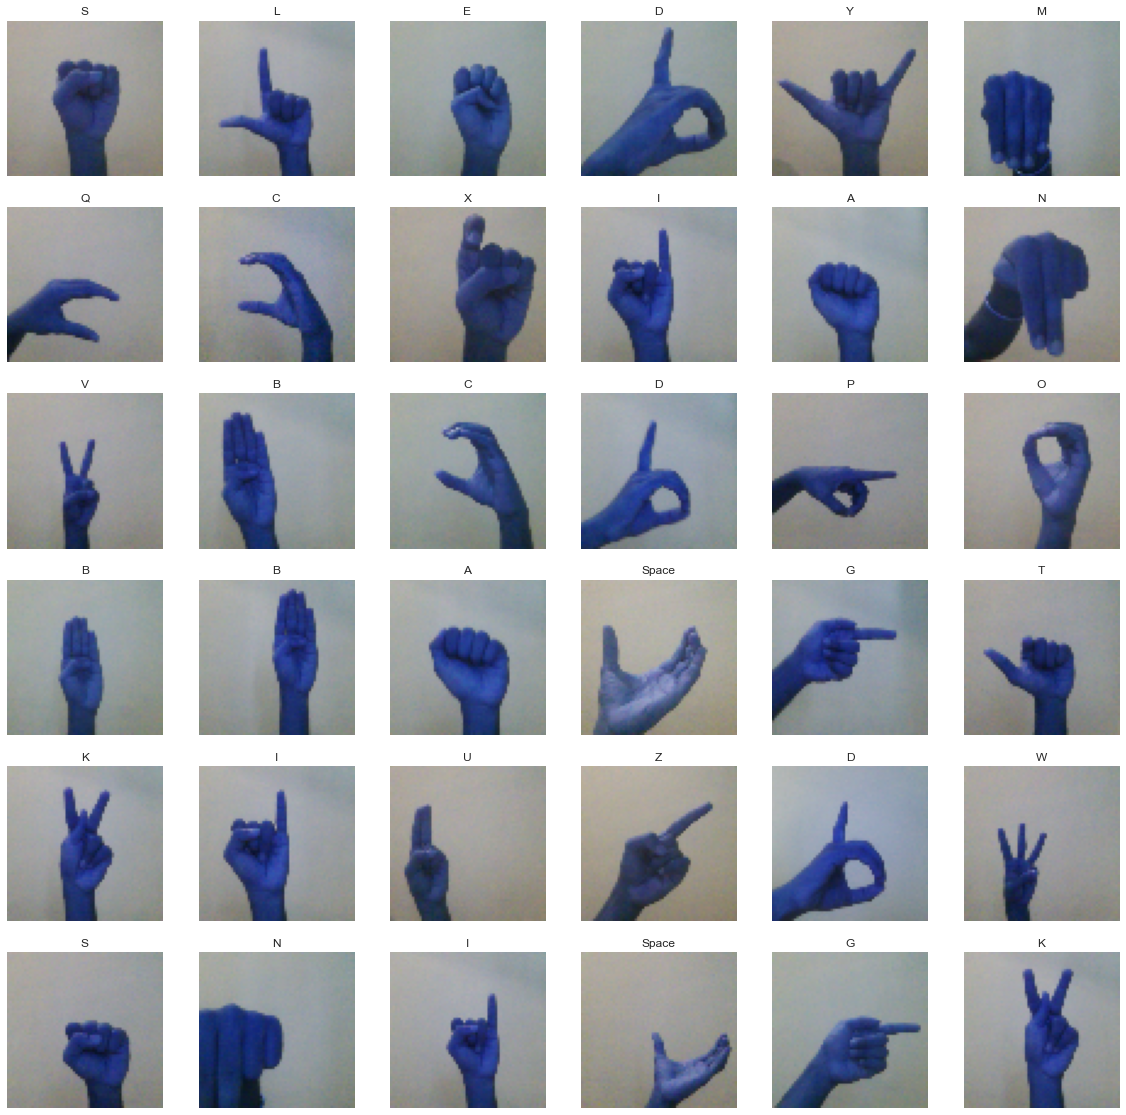

In [11]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(x_train),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))
    

In [12]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

print(f"x_train shape is: {x_train.shape}")
print(f"y_train shape is: {y_train.shape}")
print(f"x_test shape is: {x_test.shape}")
print(f"y_test shape is: {y_test.shape}")

x_train shape is: (86400, 64, 64, 3)
y_train shape is: (86400,)
x_test shape is: (13500, 64, 64, 3)
y_test shape is: (13500,)


In [13]:
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

In [14]:
kerasModel=keras.models.Sequential([
    keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(size,size,3)),
    keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(4,4),
    keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),
    keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
    keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),    
    keras.layers.MaxPool2D(4,4),
    keras.layers.Flatten(),
    keras.layers.Dense(120,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(27,activation='softmax'),
])

In [15]:
print('model details are:')
print(kerasModel.summary())

model details are:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 200)       5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 60, 60, 150)       270150    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 150)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 120)       162120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 80)        86480     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 50)          36050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2

In [16]:
kerasModel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [17]:
epochs=10
ThisModel=kerasModel.fit(x_train,y_train,epochs=epochs,batch_size=32,verbose=1)

Epoch 1/10
2700/2700 [==============================] - 113s 39ms/step - loss: 0.6892 - accuracy: 0.7858
Epoch 2/10
2700/2700 [==============================] - 107s 40ms/step - loss: 0.0873 - accuracy: 0.9719
Epoch 3/10
2700/2700 [==============================] - 108s 40ms/step - loss: 0.0714 - accuracy: 0.9794
Epoch 4/10
2700/2700 [==============================] - 108s 40ms/step - loss: 0.0589 - accuracy: 0.9837
Epoch 5/10
2700/2700 [==============================] - 108s 40ms/step - loss: 0.0436 - accuracy: 0.9868
Epoch 6/10
2700/2700 [==============================] - 109s 40ms/step - loss: 0.0496 - accuracy: 0.9863
Epoch 7/10
2700/2700 [==============================] - 110s 41ms/step - loss: 0.0387 - accuracy: 0.9894
Epoch 8/10
2700/2700 [==============================] - 110s 41ms/step - loss: 0.0309 - accuracy: 0.9903
Epoch 9/10
2700/2700 [==============================] - 110s 41ms/step - loss: 0.0401 - accuracy: 0.9891
Epoch 10/10
2700/2700 [==============================] 

In [18]:
ModelLoss ,ModelAccuracy=kerasModel.evaluate(x_test,y_test)
print('test Loss Is {}'.format(ModelLoss))
print('test Accuracy Is {}'.format(ModelAccuracy))

422/422 [==============================] - 5s 12ms/step - loss: 0.1322 - accuracy: 0.9799
test Loss Is 0.1321522295475006
test Accuracy Is 0.9799259305000305


In [19]:
y_pred = kerasModel.predict(x_test)

In [20]:
print(ThisModel.history.keys())

dict_keys(['loss', 'accuracy'])


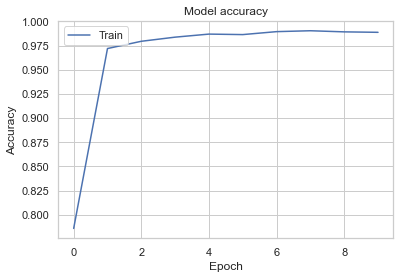

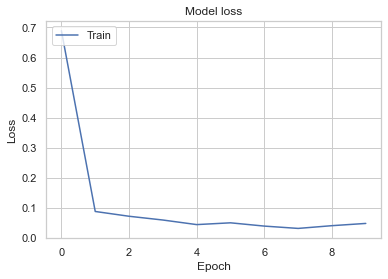

In [21]:
plt.plot(ThisModel.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(ThisModel.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
predicted = [np.argmax(i) for i in y_pred]

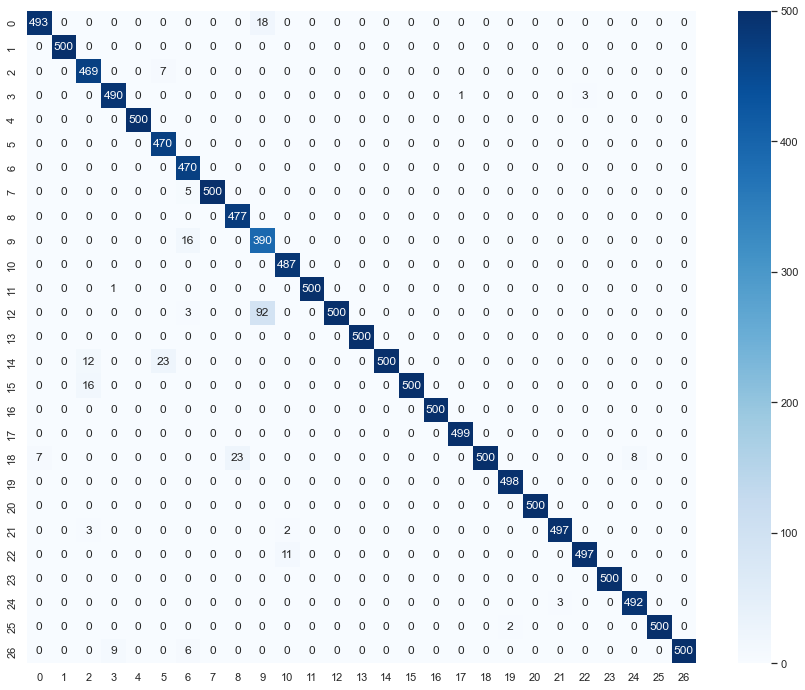

In [24]:
plt.figure(figsize=[15,12])
sns.heatmap(confusion_matrix(predicted,y_test),annot=True,fmt="d",cmap="Blues");

In [25]:
kerasModel.save('AHSmodel.model')

INFO:tensorflow:Assets written to: AHSmodel.model\assets
